<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Copy_of_Python_practice_141023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def greet(name):
  "This function greets the person passed in as a parameter"
  print("Hello", name)

In [2]:
#Calling function
greet("Abohmeed")

Hello Abohmeed


In [3]:
def add(a, b):
  "This function adds two numbers and returns the result"
  return a + b

In [4]:
result = add(2 , 3)
print(result)

5


In [7]:
def calculate_gc_content(sequence):
  "This function calculates the GC content of a DNA sequence"

  gc_content = 100*(sequence.count("G") + sequence.count("C"))/len(sequence)
  return gc_content

In [8]:
sequence = "GATTACA"
gc_content = calculate_gc_content(sequence)
print(f"The GC content of the sequence {sequence} is {gc_content}%")

The GC content of the sequence GATTACA is 28.571428571428573%


In [9]:
def factorial(n):
  "This function calculates the factorial of a number using recursion"
  if n == 0 or n == 1: #Base case
    return 1
  else: #Recursive case
    return n * factorial(n - 1)

In [10]:
print(factorial(5))

120


In [11]:
#Fibonacci Sequence
def fibonacci(n):
  "This function calculates the nth Fibonacci number using recursion"

  if n <= 1:
    return n
  else:
    return fibonacci(n - 1) + fibonacci(n - 2)

In [12]:
print(fibonacci(9))

34


In [13]:
tree = {
    'name' : 'Root', 'Children' :[
        {'name': 'A', 'Children': []},
        {'name': 'B', 'Children': [
            {'name': 'C', 'Children': []},
            {'name': 'D', 'Children': []}
        ]}
    ]
}
tree

{'name': 'Root',
 'Children': [{'name': 'A', 'Children': []},
  {'name': 'B',
   'Children': [{'name': 'C', 'Children': []},
    {'name': 'D', 'Children': []}]}]}

In [14]:
#Traversing Phylogenetic Trees
def traverse_tree(node):
  "This function recursively traverses a phylogenetic tree and prints the names of all species."
  print(node["name"]) #Print the name of the current node
  for child in node["Children"]:
    traverse_tree(child) #Recursively call the function for each child node

In [15]:
traverse_tree(tree)

Root
A
B
C
D


In [25]:
#Calculating Dinucleotide Frequency
def compute_dinucleotide_frequencies(sequenc: str) -> dict[str, float]:
  "calculate the frequencies of overlapping dinucleotides in a given DNA sequence."
  "This function takes a DNA sequence as input and calculates the frequency of each possible overlapping dinucleotide (e.g. AA, AT, AC, AG, TA, TT, TC, TG, etc.)present in the sequence."
  "The frequencies are returned as a dictionary where the keys are the dinucleotides and the values are the corresponding frequencies."
  "Parameters:"
  "sequence (str): A string representing the DNA sequence, composed of the characters A, T, C, and G."
  "Rerturns:"
  "dict[str, float]: A dictionary containing the dinucleotides as keys and their respective frequencies as values"
  "Note"
  "Dinucleotide frequencies are calculated as the count of each dinucleotide divided by the total number of overlapping dinucleotides in the sequence."
  nucleotides = ["A", "C", "T", "G"] # The different types of nucleotides
  total_dinucleotides = 0 #The number of overlapping dinucleotides in the sequence
  counts = {} #A dictionary containing the overlapping dinucleotides as keys and their corresponding counts (frequencies) as the values
  #Intialize the counts with zeroes
  for nt1 in nucleotides:
    for nt2 in nucleotides:
      dinucleotide = nt1 + nt2
      counts[dinucleotide] = 0
  #Go over the overlapping dinucleotides in the sequence and calculate the counts
  for i in range(len(sequence)-1):
    dinucleotide = sequence[i] + sequence[i+1]
    counts[dinucleotide] += 1
    total_dinucleotides += 1

  #Convert the counts to frequencies by dividing by the number of overlapping dinucleotides
  for dinucleotide in counts.keys():
    counts[dinucleotide] = round(counts[dinucleotide]/total_dinucleotides, 3)
  return counts

In [26]:
compute_dinucleotide_frequencies("GATTACA")

{'AA': 0.0,
 'AC': 0.167,
 'AT': 0.167,
 'AG': 0.0,
 'CA': 0.167,
 'CC': 0.0,
 'CT': 0.0,
 'CG': 0.0,
 'TA': 0.167,
 'TC': 0.0,
 'TT': 0.167,
 'TG': 0.0,
 'GA': 0.167,
 'GC': 0.0,
 'GT': 0.0,
 'GG': 0.0}

In [27]:
frequencies = compute_dinucleotide_frequencies("GATTACA")
sum(frequencies.values())

1.002

In [28]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00


In [29]:
import requests
from io import StringIO
from Bio import SeqIO

from Bio.SeqUtils import GC
url = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/bacteria.fa"
response = requests.get(url)
fasta_content = StringIO(response.text)

print("ID", "\t", "Sequence", "\t", "GC-content")

for record in SeqIO.parse(fasta_content, "fasta"):
  print(record.id, "\t", record.seq[:10], "\t", GC(record.seq))

ID 	 Sequence 	 GC-content
NC_000913 	 AGCTTTTCAT 	 50.79070985933456
NC_000962 	 TTGACCGATG 	 65.61466628826449


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [31]:
url = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/NC_000913.gb"
response = requests.get(url)
genbank_content = StringIO(response.text)

#Read a sequence from a GenBank content
for record in SeqIO.parse(genbank_content, "gb"):
  print(f"Accession: {record.id}")
  print(f'Organism: {record.annotations["organism"]}')
  print(f"Sequence Length: {len(record.seq)}")
  print(f"GC Content: {GC(record.seq)}%")
  print("Features:")
  for feature in record.features[:10]:
    print("\t-", feature.type, feature.location)

Accession: NC_000913.3
Organism: Escherichia coli str. K-12 substr. MG1655
Sequence Length: 4641652
GC Content: 50.79070985933456%
Features:
	- source [0:4641652](+)
	- gene [189:255](+)
	- CDS [189:255](+)
	- gene [336:2799](+)
	- CDS [336:2799](+)
	- gene [2800:3733](+)
	- CDS [2800:3733](+)
	- gene [3733:5020](+)
	- CDS [3733:5020](+)
	- gene [5233:5530](+)


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [32]:
!pip install pandas

In [2]:
url = "https://raw.githubusercontent.com/ahmedmoustafa/gene-expression-datasets/main/datasets/irf6/irf6_log2.tsv"
import pandas as pd
#Load gene expression
df = pd.read_table(url, index_col = "ID")
df.head()

,KO1,KO2,KO3,WT1,WT2,WT3
ID,,,,,,
1415670_at,12.673088,12.441596,12.736064,12.916645,12.812017,12.882624
1415671_at,13.487627,13.363957,13.377400,13.345433,13.211356,12.901282
1415672_at,13.807677,13.723458,13.818253,13.659171,13.756734,13.697587
1415673_at,11.624247,11.116019,11.672602,11.213226,11.104468,11.302239
1415674_a_at,11.966505,11.691264,11.883025,11.876747,11.615170,11.507547


In [36]:
df.describe()

,KO1,KO2,KO3,WT1,WT2,WT3
count,45101.000000,45101.000000,45101.000000,45101.000000,45101.000000,45101.000000
mean,8.766009,8.922066,8.648652,8.839982,8.731453,8.742810
std,2.694382,2.548231,2.795504,2.640402,2.723834,2.750548
min,-1.000000,-0.321928,-1.321928,0.000000,-0.736966,-1.000000
25%,6.914086,7.119979,6.710118,7.049849,6.852998,6.869131
50%,8.693835,8.868205,8.581201,8.804776,8.662490,8.735048
75%,10.713472,10.727325,10.688775,10.710634,10.696968,10.745002
max,17.061791,17.127862,17.118806,17.231357,17.165092,17.050297


In [37]:
import pandas as pd
url = "https://raw.githubusercontent.com/ahmedmoustafa/gene-expression-datasets/main/datasets/irf6/irf6_log2.tsv"
ko = df[['KO1', 'KO2', 'KO3']] #Data.frame for the KO samples
ko.head()

,KO1,KO2,KO3
ID,,,
1415670_at,12.673088,12.441596,12.736064
1415671_at,13.487627,13.363957,13.377400
1415672_at,13.807677,13.723458,13.818253
1415673_at,11.624247,11.116019,11.672602
1415674_a_at,11.966505,11.691264,11.883025


In [38]:
wt = df[['WT1', 'WT2', 'WT3']] #Data.frame for the WT samples
wt.head()

,WT1,WT2,WT3
ID,,,
1415670_at,12.916645,12.812017,12.882624
1415671_at,13.345433,13.211356,12.901282
1415672_at,13.659171,13.756734,13.697587
1415673_at,11.213226,11.104468,11.302239
1415674_a_at,11.876747,11.615170,11.507547


In [39]:
fold = ko.mean(axis=1) - wt.mean(axis=1) #Axis specifys the columns
fold.head()

ID
1415670_at     -0.253513
1415671_at      0.256971
1415672_at      0.078632
1415673_at      0.264312
1415674_a_at    0.180443
dtype: float64

<Axes: >

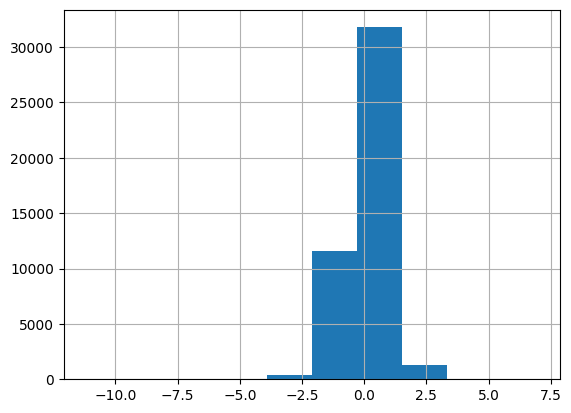

In [40]:
fold.hist()

In [41]:
filtered = df[abs(fold) > 2]
filtered.shape #Filtered dimensions

(1051, 6)

In [42]:
filtered.head()

,KO1,KO2,KO3,WT1,WT2,WT3
ID,,,,,,
1416025_at,8.030115,5.850499,6.936638,5.961160,5.013462,3.485427
1416040_at,7.500643,6.332708,6.598425,5.149747,6.352264,2.744161
1416063_x_at,6.110614,4.817623,5.675251,3.169925,3.954196,2.827819
1416200_at,13.312004,12.973357,12.868456,7.404290,8.558803,8.683696
1416236_a_at,14.148397,14.039236,14.130007,12.236044,12.022402,11.495056


In [43]:
!pip install scipy numpy

In [44]:
import numpy as np
from scipy import stats
fold2 = np.mean(ko, axis = 1) - np.mean(wt, axis=1)
fold2.head()

ID
1415670_at     -0.253513
1415671_at      0.256971
1415672_at      0.078632
1415673_at      0.264312
1415674_a_at    0.180443
dtype: float64

In [45]:
t_stat, p_value = stats.ttest_ind(ko, wt, axis=1)
t_stat_df = pd.DataFrame({'t_stat': t_stat, 'p_value': p_value})
t_stat_df.head()

,t_stat,p_value
0,-2.677586,0.055367
1,1.872445,0.134450
2,1.904526,0.129561
3,1.413610,0.230364
4,1.321077,0.256980


<Axes: >

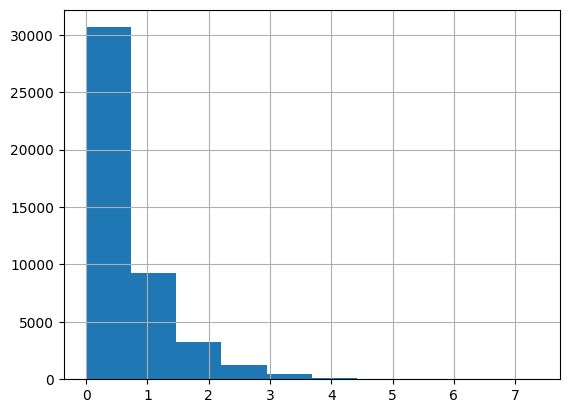

In [46]:
t_stat_df['neg_log_p_value'] = -np.log10(t_stat_df['p_value'])
t_stat_df['neg_log_p_value'].hist()

In [47]:
!pip install matplotlib

Counter({'G': 29, 'C': 26, 'A': 26, 'T': 19})


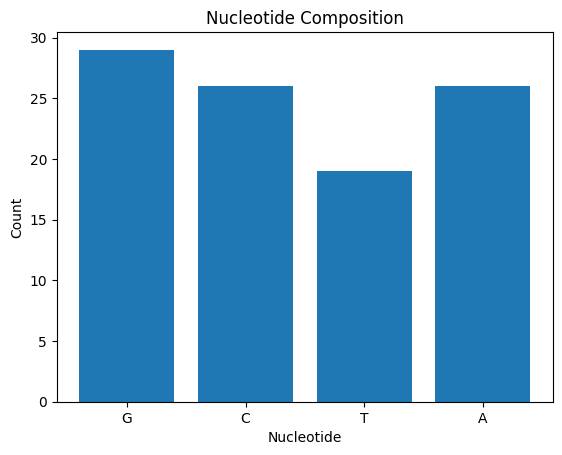

In [48]:
import matplotlib.pyplot as plt
from collections import Counter
import random

#Generate a random DNA sequence
sequence = ''.join(random.choices('ATGC', k=100))

#Calculate nucleotide compostion
counts = Counter(sequence)

#Print the counts
print(counts)

#Create a bar plot
plt.bar(counts.keys(), counts.values())
plt.title('Nucleotide Composition')
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.show()

In [49]:
!pip install seaborn

In [ ]:
import seaborn as sns
sns.clustermap(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
